# Part 1 - General Crops Analysis (Overview)

This notebook covers the basic questions asked in part 1 of our initial proposal. Part of the objects created here may be further used in the second notebook




How has the world average of harvest, yield and production changed over time with respect to:
Region/Continent
Type of Crop
Global Figures
    Build a heatmap of production across regions for visualisation purposes.
    To represent the fluctuations in overall demand. Look for sharp spikes or sudden  
changes and attempt to attribute it to a major world event or key factor that could imply causation.

Is there an overall correlation between climate change and the crop data in selected economies (that are above a certain climate risk index) in Asia (which contributes to ⅔ of the world agricultural GDP) and is there a trend to be observed? 

In selected economies in Asia, what is the correlation between agricultural yield and the GDP of the nation (is it possible to tell whether that country is largely dependent on it's agro output)?

What is the overall impact of crop production on the pricing of respective crops in Asia?

Is it possible to forecast future production and yields and if so, what direction is the trend heading in?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
sns.set(rc={'figure.figsize':(18, 3)})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.set_option('display.float_format', lambda x: x)
# pd.reset_option('^display.', silent=True)

# Reading cleaned data
Data read here was processed in the Data Processing notebook

In [3]:
crops_clean = pd.read_csv('datasets_cleaned/crops_cleaned.csv')
all_countries = pd.read_csv('datasets_cleaned/all_countries.csv')
crop_groups = pd.read_csv('datasets_cleaned/crop_groups.csv')
prices_clean = pd.read_csv('datasets_cleaned/producer_prices_cleaned.csv')
caffeine_prices_clean = pd.read_csv('datasets_cleaned/caffeine_prices_clean.csv')
rainfall = pd.read_csv('datasets_cleaned/rainfall_clean.csv')
temperatures = pd.read_csv('datasets_cleaned/temperatures_clean.csv')
gdp_data = pd.read_csv('datasets_cleaned/gdp_data.csv')

# merged data reads here!!!
yield_melted = pd.read_csv('datasets_cleaned/yield_melted.csv')
prod_melted = pd.read_csv('datasets_cleaned/prod_melted.csv')
areaHarv_melted = pd.read_csv('datasets_cleaned/areaHarv_melted.csv')
prices_melted = pd.read_csv('datasets_cleaned/prices_melted.csv')
climate_melted = pd.read_csv('datasets_cleaned/climate_melted.csv')
country_gdp_melted = pd.read_csv('datasets_cleaned/country_gdp_melted.csv')

In [4]:
rawMeltedYield = yield_melted.groupby(['Year', 'Area'])['Yield'].mean().reset_index()
rawMeltedYield

,Year,Area,Yield
0,1961,Afghanistan,40287.91667
1,1961,Africa,45553.50993
2,1961,Albania,15242.56944
3,1961,Algeria,31470.05556
4,1961,American Samoa,19846.12000
...,...,...,...
14843,2018,World,93636.97674
14844,2018,Yemen,60869.95455
14845,2018,Yugoslav SFR,0.00000
14846,2018,Zambia,82033.07692


In [5]:
rawMeltedProduction = prod_melted.groupby(['Year', 'Area'])['Production'].sum().reset_index()
rawMeltedProduction

,Year,Area,Production
0,1961,Afghanistan,10113549.00000
1,1961,Africa,391312625.00000
2,1961,Albania,1457890.00000
3,1961,Algeria,8995374.00000
4,1961,American Samoa,25852.00000
...,...,...,...
15017,2018,World,19413566384.00000
15018,2018,Yemen,4986815.00000
15019,2018,Yugoslav SFR,0.00000
15020,2018,Zambia,19756945.00000


In [6]:
areaHarvestedMelted = areaHarv_melted.groupby(['Year', 'Area'])['Area harvested'].sum().reset_index()
areaHarvestedMelted

,Year,Area,Area harvested
0,1961,Afghanistan,7959162.00000
1,1961,Africa,238329548.00000
2,1961,Albania,998260.00000
3,1961,Algeria,6841230.00000
4,1961,American Samoa,18425.00000
...,...,...,...
14901,2018,World,3456659059.00000
14902,2018,Yemen,1878576.00000
14903,2018,Yugoslav SFR,0.00000
14904,2018,Zambia,6094188.00000


In [7]:
climate_melted

,Year,Area,Rainfall - (MM),Temperature - (Celsius)
0,1991,Afghanistan,435.44990,12.89449
1,1991,Albania,917.86880,11.03765
2,1991,Algeria,88.13276,22.51346
3,1991,Andorra,757.11630,11.18815
4,1991,Angola,1017.98660,21.71688
...,...,...,...,...
5065,2016,Venezuela (Bolivarian Republic of),1844.70330,26.47820
5066,2016,Viet Nam,1988.86180,25.07316
5067,2016,Yemen,171.48137,24.22120
5068,2016,Zambia,803.47810,22.73705


In [8]:
continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
subcon_regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
        'Northern America', 'Central America', 'Caribbean', 'South America', 
        'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-eastern Asia', 'Western Asia',
        'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 
        'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regions = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regionalDict = {}
for region in regions:
    regionalDict[region] = crops_clean[crops_clean['Area']==region]

## Exploratory Data Analysis

<AxesSubplot:ylabel='Count'>

<Figure size 720x1440 with 0 Axes>

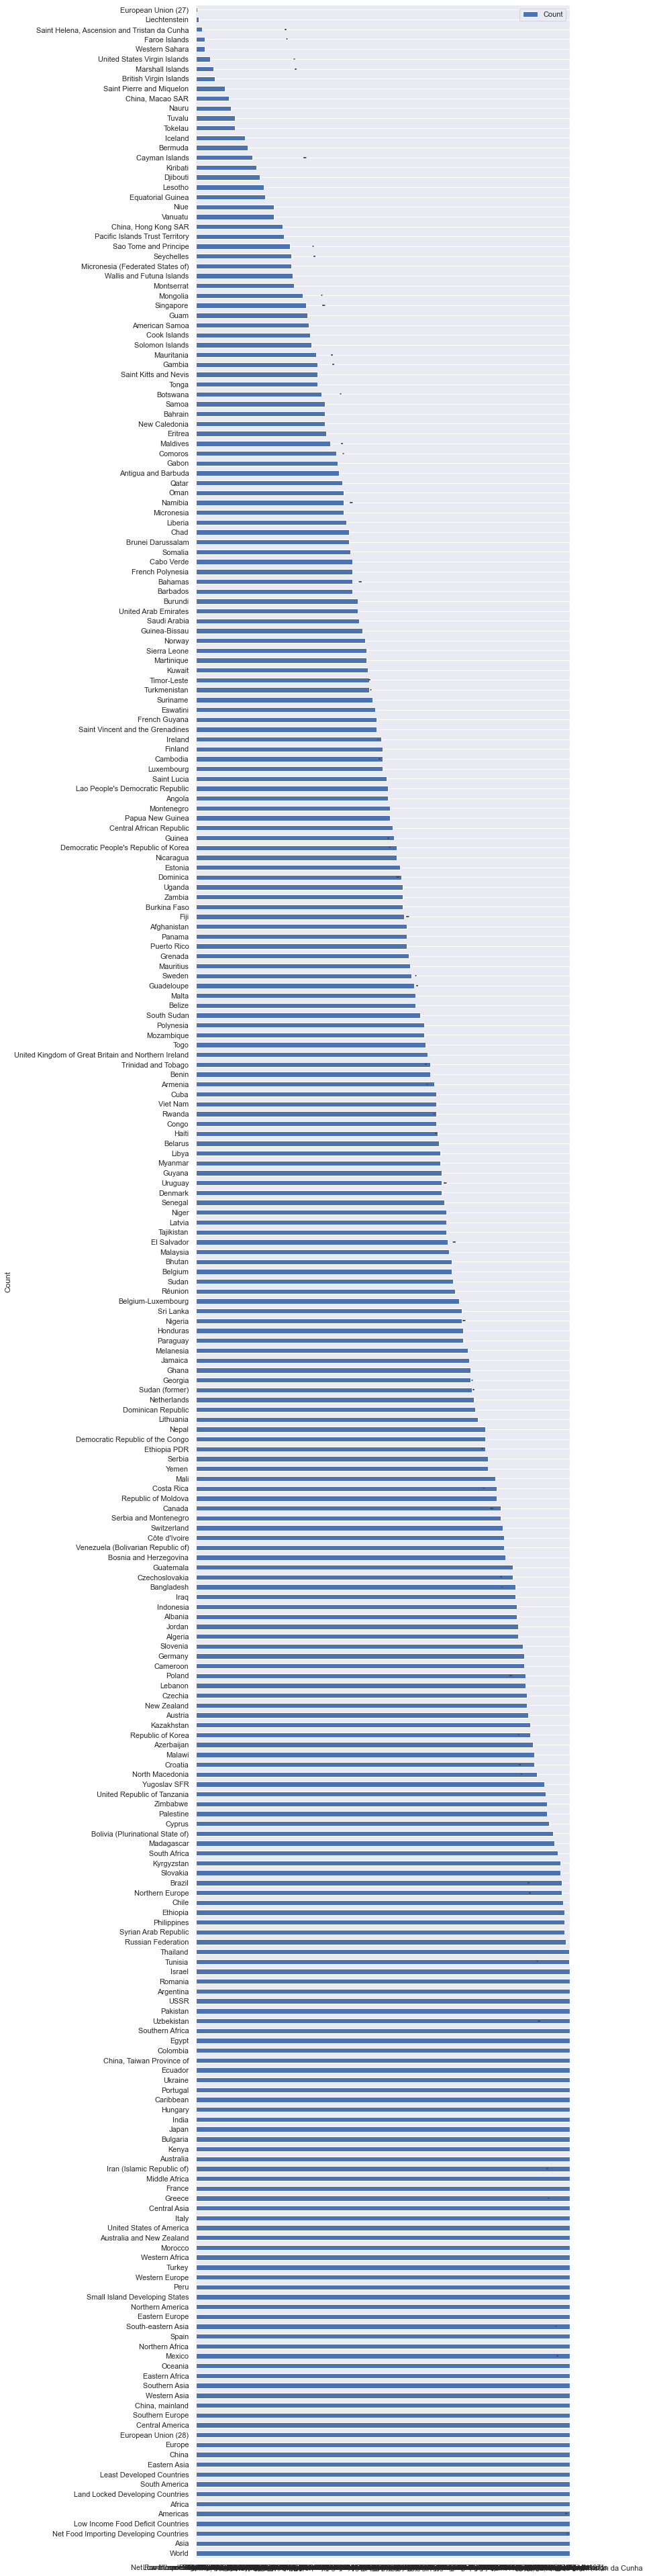

In [9]:
plt.figure(figsize=(10,20))
# sns.boxplot(raw['Area'].value_counts())

locationCounts = pd.DataFrame(crops_clean['Area'].value_counts())
locationCounts.columns = ['Count']
locationCounts.reset_index()
locationCounts.plot.barh(figsize=(10,70))
sns.boxplot(x=locationCounts.index, y='Count', width=0.15, data=locationCounts)    

## Countries and total crop production

### Question: *Which countries/territories are the top crop producers as of 2018? Take the top 30 countries.*

<AxesSubplot:ylabel='Area'>

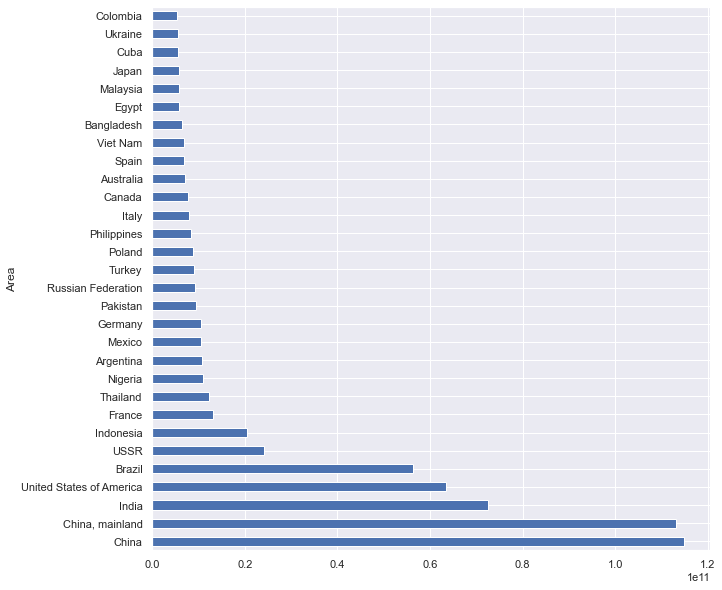

In [10]:
plt.figure(figsize=(10,20))
area_prod = prod_melted.groupby(['Area'])['Production'].sum().reset_index() # total production as of 2018 of each area
country_prod = pd.DataFrame(area_prod[area_prod['Area'].isin(all_countries['0'])]) # area is in list of all available countries

# plot simple bar chart
country_prod.set_index('Area', inplace=True)
country_prod.sort_values(by='Production', ascending=False, inplace=True)
country_prod['Production'].nlargest(30).plot.barh(figsize=(10,10))

In [11]:
world_prod_tot = prod_melted[prod_melted['Area']=='World']['Production'].sum()

top5_countries = ['China', 'India', 'United States of America', 'Brazil', 'Indonesia']
top5_countries_prod_tot = prod_melted[prod_melted['Area'].isin(top5_countries)]['Production'].sum()

(top5_countries_prod_tot / world_prod_tot) * 100

49.80641230842126

The total crop production of the top 5 producing countries make up for almost 50% of the total world crop production!

In [13]:
world = regionalDict['World']
worldProductionTotal = world[world['Element'] == 'Production'].loc[:, '1961':]
worldYieldTotal = world[world['Element'] == 'Yield'].loc[:, '1961':]
worldAreaHarvested = world[world['Element'] == 'Area harvested'].loc[:, '1961':]

### World crop production and yield timelines

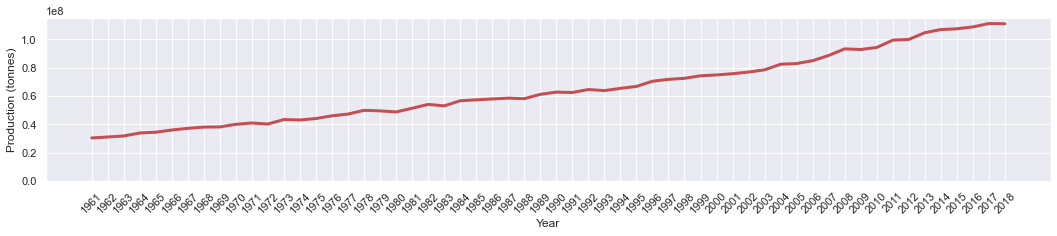

In [14]:
plt.xticks(rotation=45)
plt.plot(worldProductionTotal.mean(), label='Production', color='r', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.ylim(0)
plt.show()

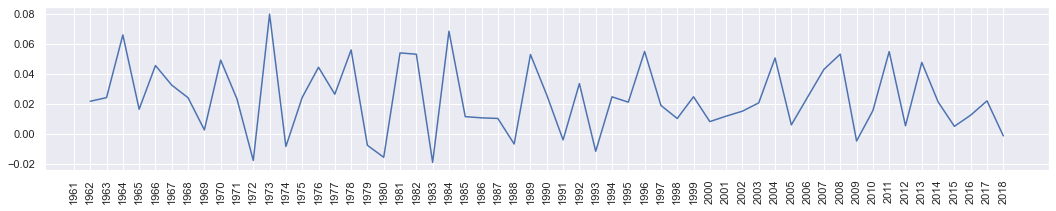

In [15]:
change = worldProductionTotal.mean().pct_change()
change.plot()
plt.xticks(range(len(change.index)), change.index, rotation=90)
plt.show()

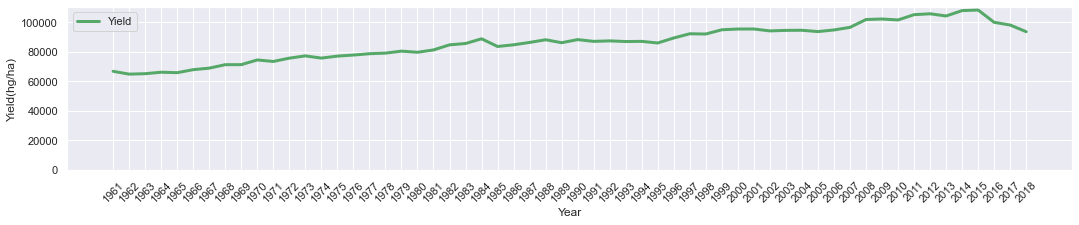

In [16]:
plt.xticks(rotation=45)
plt.plot(worldYieldTotal.mean(), label='Yield', color='g', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Yield(hg/ha)')
plt.legend()
plt.ylim(0)
plt.show()

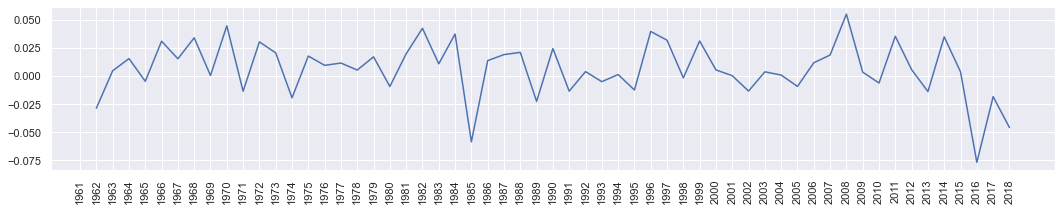

In [17]:
changeYield = worldYieldTotal.mean().pct_change()
changeYield.plot()
plt.xticks(range(len(changeYield.index)), changeYield.index, rotation=90)
plt.show()

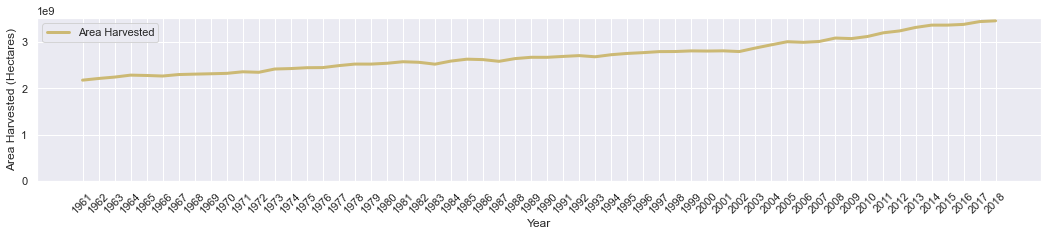

In [18]:
plt.xticks(rotation=45)
plt.plot(worldAreaHarvested.sum(), label='Area Harvested', color='y', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Area Harvested (Hectares)')
plt.legend()
plt.ylim(0)
plt.show()

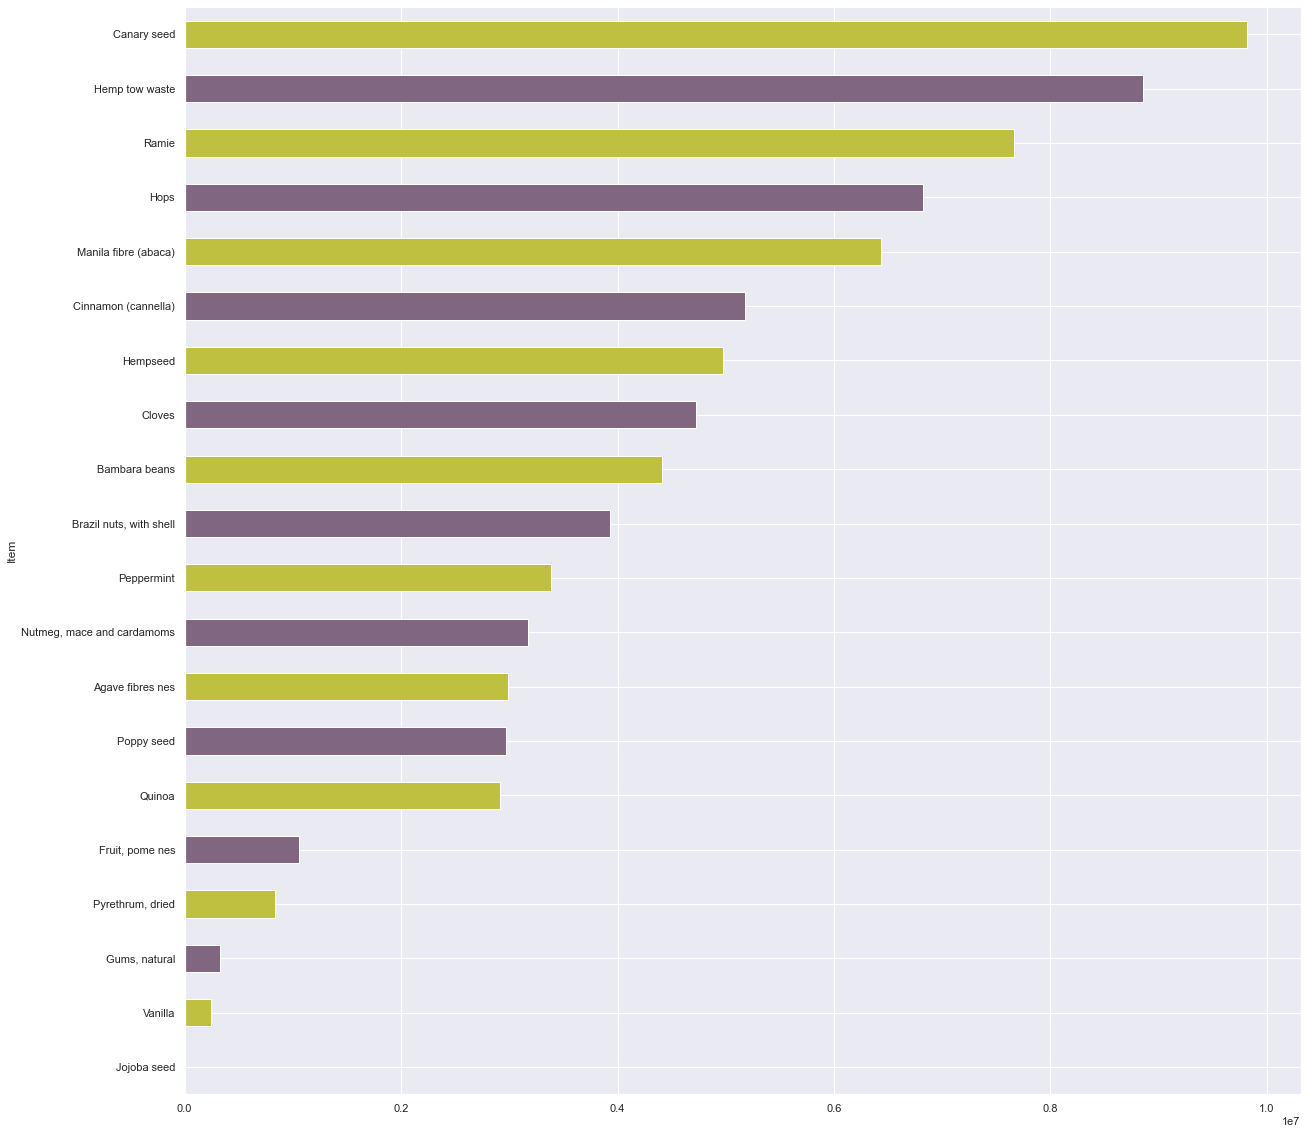

In [19]:
worldProduction = world[world['Element'] == 'Production']
worldProductionByItem = worldProduction.groupby('Item').sum().loc[:, '1961':]
# worldProductionByItem.iloc[0].plot()
plt.figure(figsize=(20,20))

my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5

ax = worldProductionByItem.sum(axis=1).sort_values().iloc[0:20].round(3).plot.barh(color=my_colors)

# for i in range(1, len(worldProductionByItem)):
#     ax = worldProductionByItem.iloc[i].plot(figsize=(20, 10), label=worldProductionByItem.index[i], kind='bar')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Production(tonnes)')
# print('The best performing on average seems to be: ' + worldProductionByItem.mean(axis=1).idxmax())
# plt.grid(True)

### Question: *What is the correlation between climate change (surface temperatures in this case) and crop production in countries that rank in the top 3 in Climate Risk Indexes?*

These are the countries with notably high climate risk indexes and we will be observing the ones at the top.
###   
<div>
<img src="attachment:image.png" width="300"/>
</div>

### Question: *In countries with a High Climate Risk Index, what is the correlation and does correlation actually imply causation?*

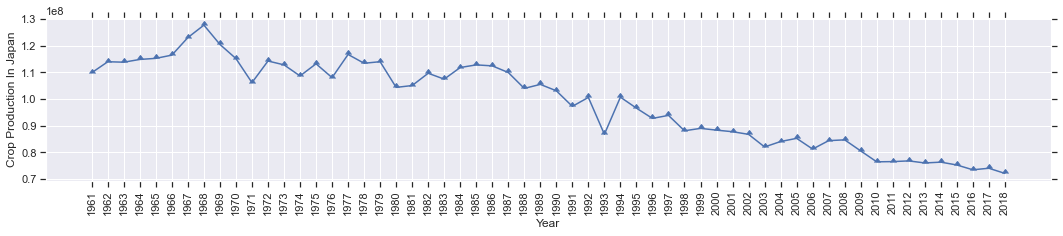

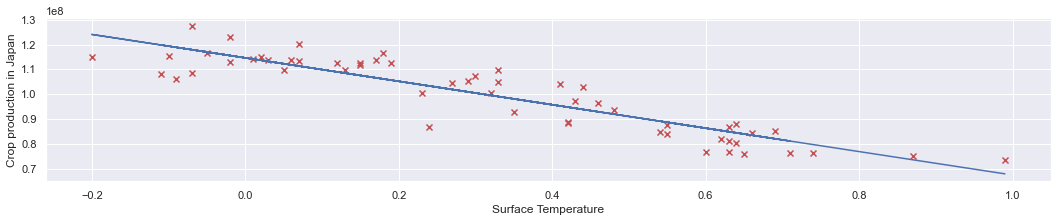

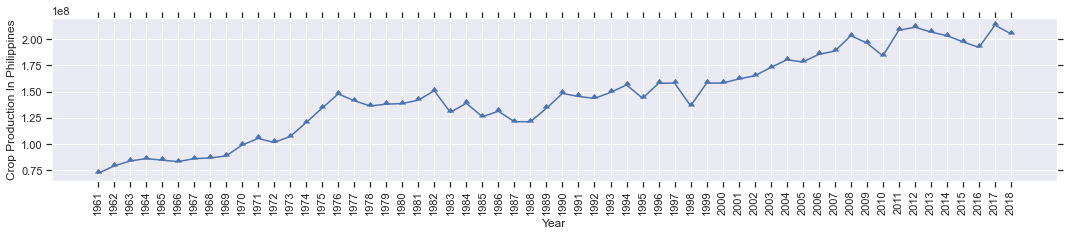

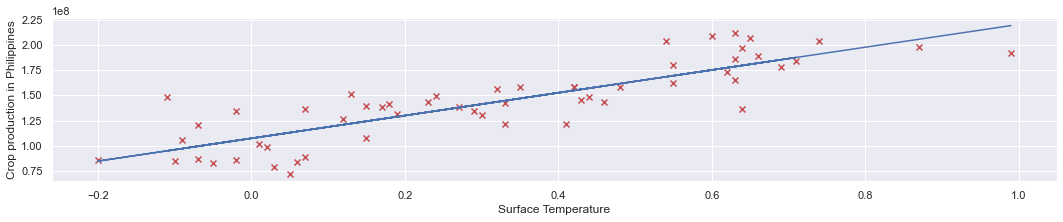

In [20]:
climate = pd.read_csv('datasets_raw/climate/annual_csv.csv')
surfaceTemp = pd.DataFrame(climate[np.logical_and(climate['Source']=='GISTEMP', climate['Year']>=1961)].sort_values(by=['Year']))
surfaceTemp.rename({"Mean": "SurfaceTemp"}, inplace=True)
surfaceTemp['Year'] = pd.to_numeric(surfaceTemp['Year'])
surfaceTemp.drop(['Source'], axis=1, inplace=True)
surfaceTemp.set_index('Year', inplace=True)

HighCRICountries = ['Japan', 'Philippines']

for country in HighCRICountries:
    AreaAggregated = crops_clean[crops_clean['Area']==country]
    AreaProductionYearly = AreaAggregated[AreaAggregated['Element']=='Production'].loc[:,'1961':].sum()
    plt.plot(AreaProductionYearly, marker=10)
    plt.xlabel('Year')
    plt.ylabel('Crop Production In ' + country)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
    labelbottom='on')
    plt.xticks(rotation=90)
    plt.show()

    areaFormatted = pd.DataFrame()
    count = 0
    for year, value in AreaProductionYearly.iteritems():
        areaFormatted.loc[count, 'Year'] = year
        areaFormatted.loc[count, 'Total'] = value
        count += 1
    areaFormatted['Year'] = pd.to_numeric(areaFormatted['Year'])

    areaMerged = areaFormatted.merge(surfaceTemp, on='Year')
    areaMerged.set_index('Year', inplace=True)

    plt.scatter(areaMerged['Mean'], areaMerged['Total'], marker='x', cmap='viridis_r', color='r')
    plt.xlabel('Surface Temperature')
    plt.ylabel('Crop production in ' + country)

    x = np.array(areaMerged['Mean'])
    y = np.array(areaMerged['Total'])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.show()

For Japan, the overall correlation is negative. But for other countries who have faced the impact of climate change, there is a weak to moderate positive correlation. Because of this, we can perhaps say, that the impact is not too apparent or there are other factors that need to be taken into account (industrial development, nature of crops grown, etc.), geographical position on the map and more.

### Question: *As of 2018, which crop items have the best/worst yield? Group by crop type.*

In [21]:
# all the crop 'types'
crop_groups['crop_type'].unique()

array(['Treenuts', 'Others', 'Fruit', 'Cereals', 'Oilcrops', 'Vegetables',
       'Roots and Tubers', 'Pulses', 'Sugar Crops', 'Fibre Crops'],
      dtype=object)

In [22]:
crop_data = crops_clean.copy()
crop_data

,Area,Item,Element,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"Almonds, with shell",Area harvested,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,11029.00000,11210.00000,13469.00000,13490.00000,14114.00000,13703.00000,14676.00000,19481.00000,19793.00000,20053.00000
1,Afghanistan,"Almonds, with shell",Yield,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,39154.00000,49955.00000,45000.00000,45960.00000,29910.00000,19996.00000,16521.00000,16859.00000,13788.00000,17161.00000
2,Afghanistan,"Almonds, with shell",Production,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,43183.00000,56000.00000,60611.00000,62000.00000,42215.00000,27400.00000,24246.00000,32843.00000,27291.00000,34413.00000
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,17748.00000,17000.00000,19500.00000,18500.00000,18500.00000,30000.00000,25000.00000,25638.00000,27582.00000,25785.00000
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,6203.00000,6000.00000,6414.00000,6757.00000,6757.00000,7167.00000,7200.00000,7037.00000,6954.00000,7036.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50246,Net Food Importing Developing Countries,"Treenuts, Total",Yield,6118.00000,6318.00000,6618.00000,6492.00000,6417.00000,6187.00000,5978.00000,...,4728.00000,5415.00000,5429.00000,5417.00000,5198.00000,5177.00000,5234.00000,5514.00000,5251.00000,5461.00000
50247,Net Food Importing Developing Countries,"Treenuts, Total",Production,255724.00000,295318.00000,315667.00000,349663.00000,341957.00000,336409.00000,318793.00000,...,1338811.00000,1370375.00000,1619567.00000,1662130.00000,1772637.00000,1835843.00000,2090427.00000,1953370.00000,2076194.00000,2219089.00000
50248,Net Food Importing Developing Countries,Vegetables Primary,Area harvested,1877800.00000,1925219.00000,1992435.00000,2054949.00000,2039738.00000,2138112.00000,2172385.00000,...,6215085.00000,6377100.00000,6423774.00000,6456448.00000,6578776.00000,6792359.00000,6989468.00000,7030316.00000,7043245.00000,7233314.00000
50249,Net Food Importing Developing Countries,Vegetables Primary,Yield,66297.00000,67612.00000,68080.00000,69544.00000,71377.00000,72030.00000,71793.00000,...,115100.00000,113551.00000,114497.00000,116388.00000,115156.00000,117847.00000,118811.00000,117457.00000,116865.00000,117018.00000


In [23]:
# return the crop type of a given crop
def getCropType(crop):
    return crop_groups.loc[crop_groups['crop']==crop, 'crop_type'].iloc[0]

In [24]:
# melting for yield values
rawMeltedYield = crops_clean.copy()[crops_clean['Element'] == 'Yield'].melt(id_vars=['Item'], value_vars=crops_clean.columns[3:],
                              var_name='Year', value_name='Yield')
rawMeltedYield = rawMeltedYield.groupby(['Year','Item'])['Yield'].mean().reset_index()
rawMeltedYield['Year'] = rawMeltedYield['Year'].astype(str)
rawMeltedYield['Item'] = rawMeltedYield['Item'].astype(str)
rawMeltedYield

,Year,Item,Yield
0,1961,Agave fibres nes,8626.00000
1,1961,"Almonds, with shell",5492.85333
2,1961,"Anise, badian, fennel, coriander",8103.61194
3,1961,Apples,67179.63846
4,1961,Apricots,40263.58586
...,...,...,...
9971,2018,"Walnuts, with shell",28358.46988
9972,2018,Watermelons,237755.74675
9973,2018,Wheat,30050.12805
9974,2018,Yams,95444.28736


In [25]:
cropMeltedYield = pd.DataFrame(rawMeltedYield.loc[rawMeltedYield['Item'].isin(crop_groups['crop'])])

cropMeltedYield['crop_type']= cropMeltedYield['Item'].apply(lambda x: getCropType(x))

cropMeltedYield

,Year,Item,Yield,crop_type
0,1961,Agave fibres nes,8626.00000,Fibre Crops
1,1961,"Almonds, with shell",5492.85333,Treenuts
2,1961,"Anise, badian, fennel, coriander",8103.61194,Others
3,1961,Apples,67179.63846,Fruit
4,1961,Apricots,40263.58586,Fruit
...,...,...,...,...
9971,2018,"Walnuts, with shell",28358.46988,Treenuts
9972,2018,Watermelons,237755.74675,Fruit
9973,2018,Wheat,30050.12805,Cereals
9974,2018,Yams,95444.28736,Roots and Tubers


In [26]:
# print results (visual??)
for crop_type in crop_groups['crop_type'].unique():
    v = cropMeltedYield[cropMeltedYield['crop_type']==crop_type]
    print(crop_type)
    print(v.groupby('Item')['Yield'].mean().nlargest(5))
    print(v.groupby('Item')['Yield'].mean().nsmallest(5).sort_values(ascending=False))
    print()

Treenuts
Item
Brazil nuts, with shell   145723.79310
Walnuts, with shell        71683.02410
Nuts nes                   18489.64241
Chestnut                   15659.37108
Almonds, with shell        11520.88345
Name: Yield, dtype: float64
Item
Chestnut                  15659.37108
Almonds, with shell       11520.88345
Cashew nuts, with shell    9526.59947
Pistachios                 8449.19512
Hazelnuts, with shell      7459.23887
Name: Yield, dtype: float64

Others
Item
Chicory roots   134669.22629
Peppermint       94886.82020
Maté             84944.95813
Ginger           66107.01638
Spices nes       56857.40744
Name: Yield, dtype: float64
Item
Kola nuts                    4547.49072
Cocoa, beans                 3778.37536
Nutmeg, mace and cardamoms   3560.00796
Cloves                       3129.15000
Vanilla                      1933.85789
Name: Yield, dtype: float64

Fruit
Item
Carobs        170863.83744
Pineapples    166147.06953
Papayas       158142.15124
Bananas       140901.61171
W

### Question: *As of 2018, which crop items have be produced the most? Group by crop type.*

In [27]:
cropMeltedProd = prod_melted.groupby(['Year', 'Item'])['Production'].sum().reset_index()

In [28]:
# taking crop single crop items only
cropMeltedProd = pd.DataFrame(cropMeltedProd.loc[cropMeltedProd['Item'].isin(crop_groups['crop'])])

# adding and filling another column for type of crop
cropMeltedProd['crop_type']= cropMeltedProd['Item'].apply(lambda x: getCropType(x))

cropMeltedProd

,Year,Item,Production,crop_type
0,1961,Agave fibres nes,164400.00000,Fibre Crops
1,1961,"Almonds, with shell",3656713.00000,Treenuts
2,1961,"Anise, badian, fennel, coriander",402986.00000,Others
3,1961,Apples,77242584.00000,Fruit
4,1961,Apricots,6002292.00000,Fruit
...,...,...,...,...
10145,2018,"Walnuts, with shell",16728952.00000,Treenuts
10146,2018,Watermelons,503981658.00000,Fruit
10147,2018,Wheat,3430498851.00000,Cereals
10148,2018,Yams,339885318.00000,Roots and Tubers


In [29]:
# print results (visual??)
for crop_type in crop_groups['crop_type'].unique():
    v = cropMeltedProd[cropMeltedProd['crop_type']==crop_type]
    print(crop_type)
    print(v.groupby('Item')['Production'].sum().nlargest(5))
    print(v.groupby('Item')['Production'].sum().nsmallest(5).sort_values(ascending=False))
    print()

Treenuts
Item
Cashew nuts, with shell   507675553.00000
Almonds, with shell       365783079.00000
Walnuts, with shell       357171527.00000
Chestnut                  262234968.00000
Hazelnuts, with shell     143156866.00000
Name: Production, dtype: float64
Item
Chestnut                  262234968.00000
Hazelnuts, with shell     143156866.00000
Nuts nes                  136802035.00000
Pistachios                 84516557.00000
Brazil nuts, with shell    17729932.00000
Name: Production, dtype: float64

Others
Item
Rice, paddy (rice milled equivalent)   95680893747.00000
Coffee, green                           1717021389.00000
Tobacco, unmanufactured                 1711138897.00000
Rubber, natural                         1574153477.00000
Tea                                      824408332.00000
Name: Production, dtype: float64
Item
Peppermint                   15904026.00000
Nutmeg, mace and cardamoms   15260648.00000
Pyrethrum, dried              5113952.00000
Vanilla                    

#ANSWER HERE!

### Question: *As of 2018?, which top 10 countries have produced highest number of different crop items (crop variation)?*

In [30]:
cropMeltedProd2 = prod_melted.groupby(['Area', 'Item'])['Production'].sum().reset_index()

In [31]:
filt1 = np.logical_and(cropMeltedProd2['Area'].isin(all_countries['0']), cropMeltedProd2['Production'] > 0)
view1 = cropMeltedProd2.loc[filt1]
view1

,Area,Item,Production
0,Afghanistan,"Almonds, with shell",816387.00000
1,Afghanistan,"Anise, badian, fennel, coriander",250153.00000
2,Afghanistan,Apples,2260156.00000
3,Afghanistan,Apricots,2870921.00000
4,Afghanistan,Barley,17782532.00000
...,...,...,...
17191,Zimbabwe,Vanilla,398.00000
17192,Zimbabwe,Vegetables Primary,8855959.00000
17193,Zimbabwe,"Vegetables, fresh nes",7470505.00000
17194,Zimbabwe,"Vegetables, leguminous nes",17007.00000


In [32]:
print('Countries with most variation in crop produce:')
print(view1.groupby(['Area'])['Item'].count().nlargest(20))

Countries with most variation in crop produce:
Area
China                         137
China, mainland               132
Mexico                        125
Spain                         118
Turkey                        111
Morocco                       110
Peru                          110
Italy                         106
United States of America      106
Greece                        104
France                        101
Iran (Islamic Republic of)    100
Australia                      98
Bulgaria                       98
Kenya                          98
India                          96
Portugal                       96
Hungary                        95
Japan                          95
Ukraine                        93
Name: Item, dtype: int64


In [33]:
view1[view1['Area'].str.contains('Macao')]

,Area,Item,Production
3273,"China, Macao SAR",Pepper (piper spp.),7944.00000


# Studying crops that are primary sources of caffeine

> Question: *What are the biggest sources of caffeine?*

<AxesSubplot:>

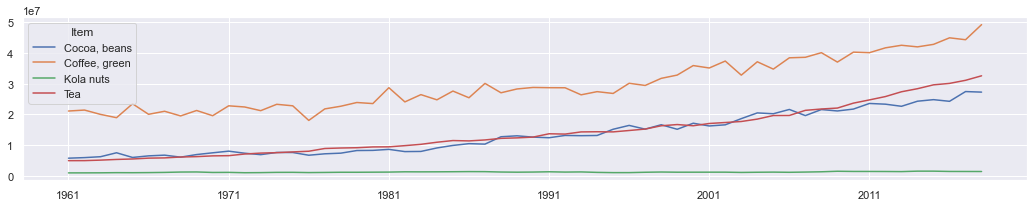

In [34]:
caffeineProduction = crops_clean[crops_clean['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineProduction = caffeineProduction[caffeineProduction['Element'] == 'Production']
caffeineProduction.groupby('Item').sum().loc[:,'1961':].T.plot()

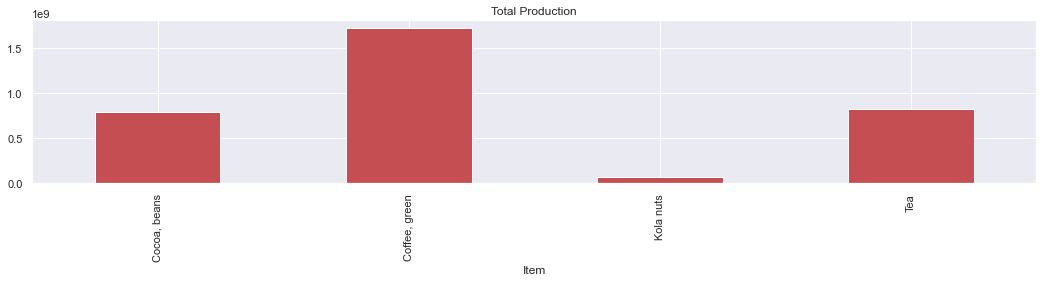

In [35]:
# Total production over the years
caffeineProduction.groupby('Item').sum().loc[:,'1961':].sum(axis=1).plot.bar(color='r')
plt.title('Total Production')
plt.show()

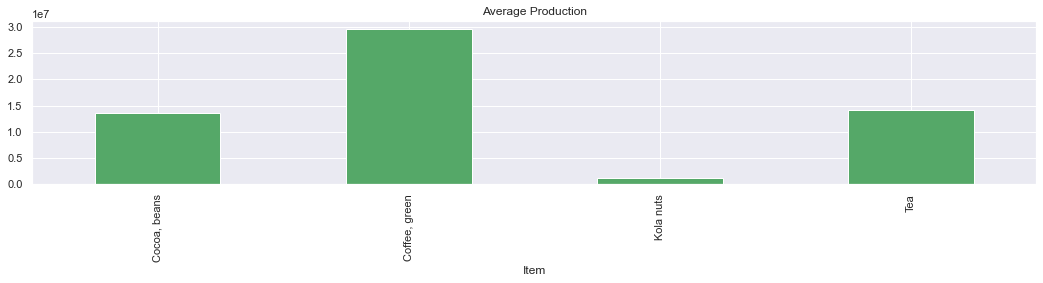

In [36]:
caffeineProduction.groupby('Item').sum().loc[:,'1961':].mean(axis=1).plot.bar(color='g')
plt.title('Average Production')
plt.show()

> Question: *How has caffeine crop production changed over the decades, measured across Asia Pacific/Africa/Latin America and if a trend is observed for one, does that same trend apply for the others?*

,index,Area,Item,Year,Price,continent
1457,5557,Russian Federation,Tea,2017,72627.40000,Europe
1458,5558,Russian Federation,Tea,2018,67614.80000,Europe
1459,5559,Russian Federation,Tea,2019,64362.30000,Europe
1773,6764,United States of America,"Coffee, green",2019,44313.00000,Americas
1772,6762,United States of America,"Coffee, green",2018,42770.00000,Americas
...,...,...,...,...,...,...
524,2034,Ecuador,"Coffee, green",1996,24.70000,Americas
520,2029,Ecuador,"Coffee, green",1994,14.20000,Americas
518,2027,Ecuador,"Coffee, green",1993,8.60000,Americas
516,2025,Ecuador,"Coffee, green",1992,5.20000,Americas


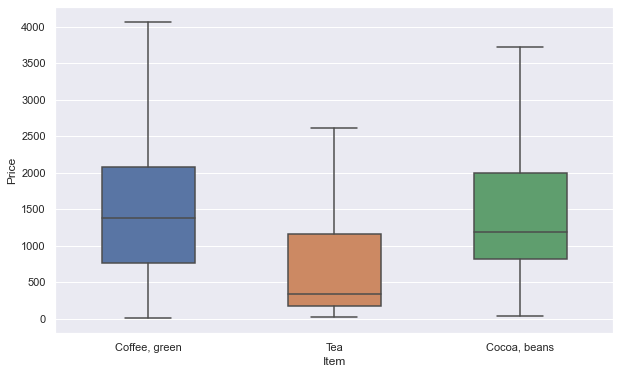

In [12]:
#distribution of prices
plt.figure(figsize=(10,6))
sns.boxplot(y='Price', x='Item',width=0.5, data=caffeine_prices_clean, showfliers=False)
caffeine_prices_clean.sort_values(by='Price', ascending=False)

### Comparing sub-regionally

<AxesSubplot:ylabel='Area'>

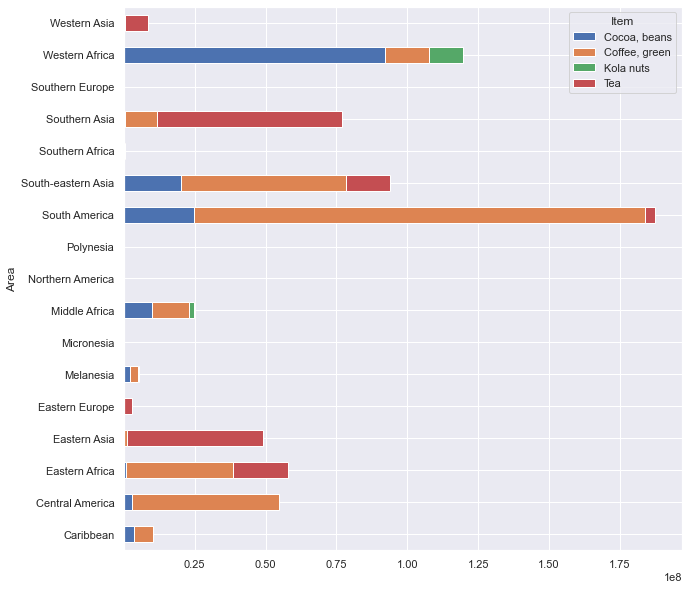

In [37]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(subcon_regions)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']

# regionsProduction.groupby('Area').sum().mean(axis=1).plot.bar()
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

South America appears to be the biggest producer of caffeine-based crops in the world and it's biggest produce is green coffee beans, astronomically higher than any other region in the world.

### Comparing continentally

<AxesSubplot:ylabel='Area'>

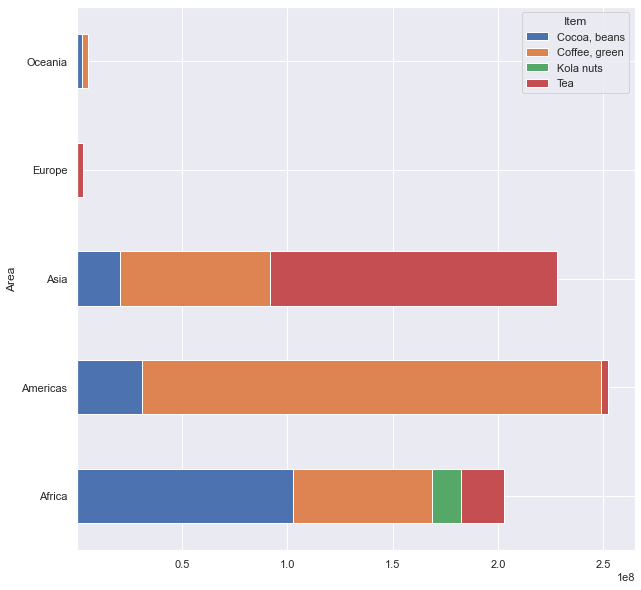

In [38]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(continents)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

Similarly, North and South America cumulatively produce the most caffeine-based crops while Asia comes close. North and South America are the biggest producers of green coffee beans, while Asia produces the most tea leaves and Africa produces the most cocoa beans. The three regions actively grow a different combination of crops and contribute differently to the global market.

## Asia, Africa, Americas (World's Biggest Manufacturers)

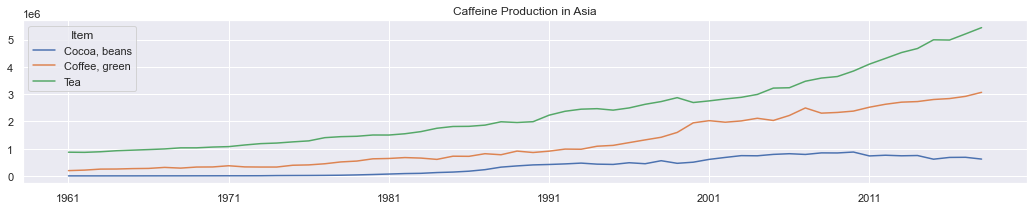

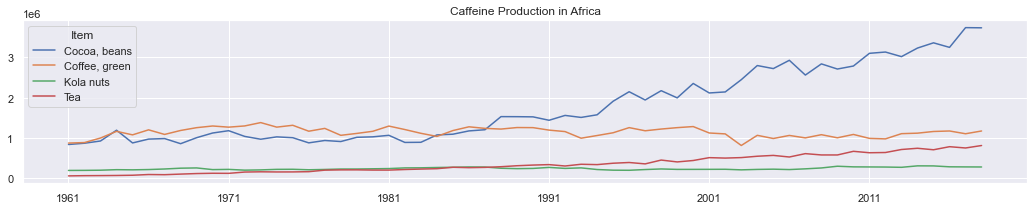

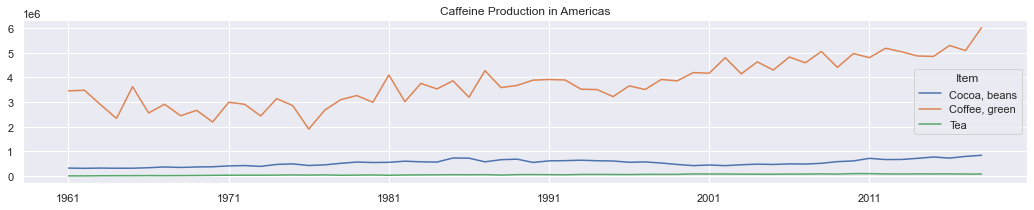

In [39]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contProduction.T.plot(title=f'Caffeine Production in {continent}')

### Understanding the trends
The takeaways from the depictions:

1) Global Production of Caffeine based crops is on an overall upward trend, even if there are mild fluctuations over the years. This can be attributed to either an increasing population, increasing demand, further cultivation of these crops, higher export rates, etc.

2) The 3 biggest sources of caffeine are cocoa beans, green coffee beans and tea leaves and each of the regions are leaders in each of these. Asia sort of ```specialises```in tea leaves, Africa in cocoa and the Americas in green coffee beans.

3) In proportion, coffee beans production in the Americas is not very stable, with sudden spikes and extreme fluctuations, the pattern being much more noticeable than the other 2 continents.

4) Asia's growth, at first sight, is the smoothest.

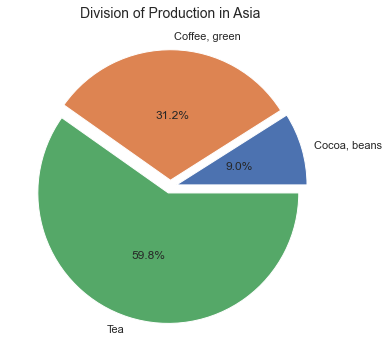

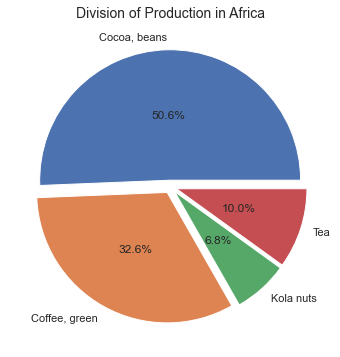

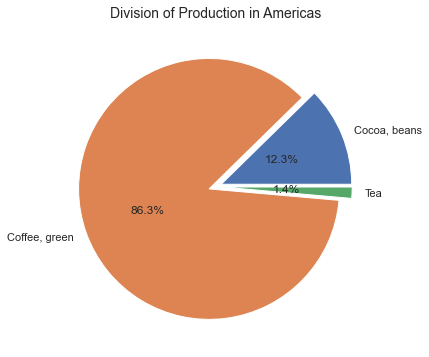

In [40]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contTotals = contProduction.sum(axis=1)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = contTotals.keys()
    plt.pie(x=contTotals, autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.5)
    plt.title(f"Division of Production in {continent}", fontsize=14);

While pie charts aren't a good indication of volume, it does say something about how the market share is split and it reaffirms the points made above.

3. How has the price of caffeine crops changed over the years in these chosen economies and is that attributed to any particular factor (a sudden introduction of an alternative, etc.)? Is there an effect of production levels on the prices of caffeine-based crops (helps to weigh their value)? When production increases or decreases, what generally happens

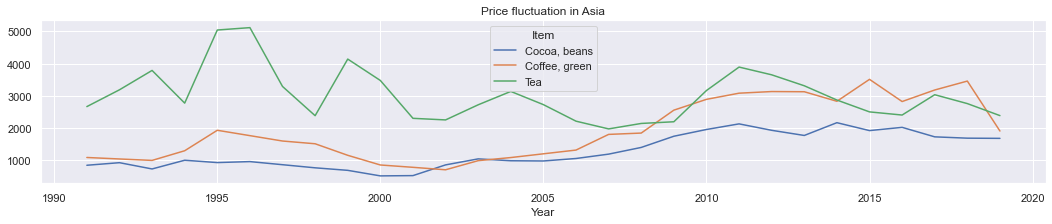

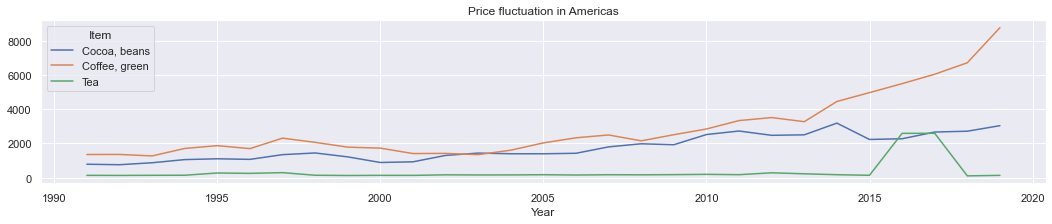

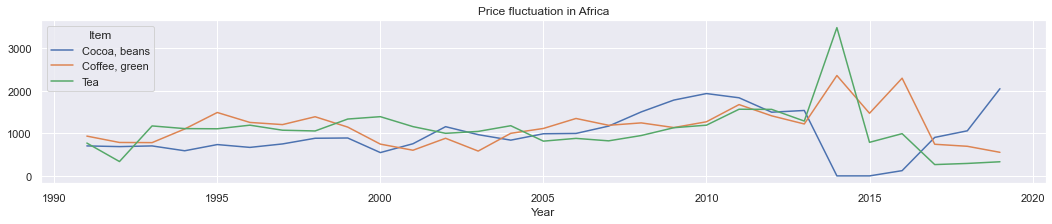

In [41]:
biggestManufacturers = ['Asia', 'Americas', 'Africa']
caffeine_prices_clean.fillna(0, inplace=True)
for continent in biggestManufacturers:
    caffeinePriceRange = caffeine_prices_clean[caffeine_prices_clean['continent'] == continent].set_index('Year')
    continentGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    continentGrouped.fillna(0, inplace=True)
    continentGrouped.plot(title=f'Price fluctuation in {continent}')

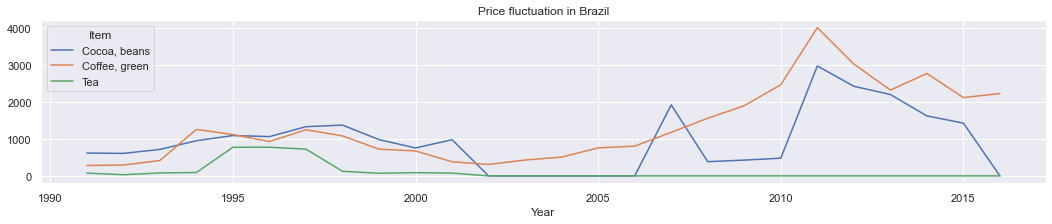

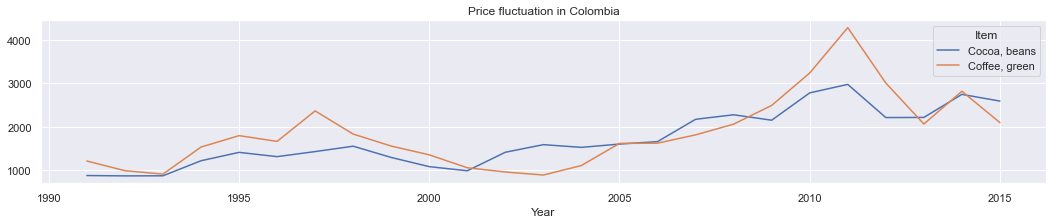

In [42]:
countries = ['Brazil', 'Colombia']
# print(caffeinePrices['Area'].value_counts())
for country in countries:
    caffeinePriceRange = caffeine_prices_clean[caffeine_prices_clean['Area'] == country].set_index('Year')
    countryGrouped = caffeinePriceRange.groupby(['Year','Item'])['Price'].mean().unstack()
    countryGrouped.fillna(0, inplace=True)
    countryGrouped.plot(title=f'Price fluctuation in {country}')

In [43]:
caffeineSorted = caffeineProduction.groupby(['Item']).mean().T.reset_index()
priceMerge = caffeine_prices_clean.drop(['Area'], axis=1)

caffeineSorted.columns = ['Year', 'Cocoa, beans', 'Coffee, green', 'Kola nuts', 'Tea']
caffeineSorted['Year']
caffeineSorted = pd.melt(caffeineSorted, id_vars=['Year'], value_vars=caffeineSorted.columns[1:], var_name='Item', value_name='Production')
caffeineSorted.Year = caffeineSorted.Year.astype(str)
priceMerge.Year = priceMerge.Year.astype(str)
merged = caffeineSorted.merge(priceMerge, on=['Year', 'Item'])

merged.set_index('Year')
# sns.regplot(x='Production', y='Value',data=merged)

,Item,Production,index,Price,continent
Year,,,,,
1991,"Cocoa, beans",141940.19540,453,823.60000,Americas
1991,"Cocoa, beans",141940.19540,633,619.70000,Americas
1991,"Cocoa, beans",141940.19540,920,709.00000,Africa
1991,"Cocoa, beans",141940.19540,1228,870.10000,Americas
1991,"Cocoa, beans",141940.19540,1333,311.90000,Africa
...,...,...,...,...,...
2018,Tea,423099.68831,5558,67614.80000,Europe
2018,Tea,423099.68831,5936,195.60000,Africa
2018,Tea,423099.68831,6108,554.00000,Asia


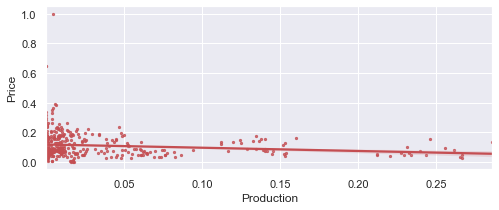

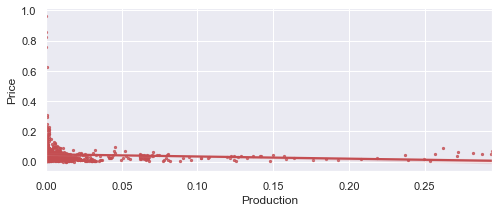

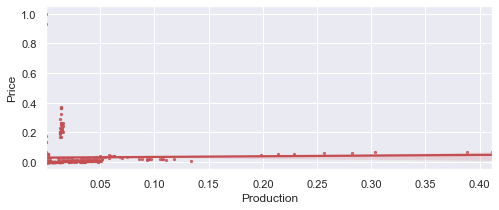

In [44]:
#Looking at coffee, green beans
def prodPriceCorr(item):
    greencoffeeprices = caffeine_prices_clean.copy()[caffeine_prices_clean['Item'] == item]
    greencoffeeproduction = caffeineProduction[caffeineProduction['Item'] == item]
    greencoffeeproduction = greencoffeeproduction.melt(id_vars=['Area'], value_vars=greencoffeeproduction.columns[3:],
                              var_name='Year', value_name='Production')
#     greencoffeeprices.drop(columns=['Item', 'Item Code', 'continent'], inplace=True)
    greencoffeeprices['Year'] = greencoffeeprices['Year'].astype(str)
    greencoffeeproduction['Year'] = greencoffeeproduction['Year'].astype(str)
    
    greencoffeeproduction[['Production']] = greencoffeeproduction[['Production']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
    greencoffeeprices[['Price']] = greencoffeeprices[['Price']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    merged = greencoffeeproduction.merge(greencoffeeprices, on=['Area', 'Year'])
    merged.sort_values(by='Production')

    plt.figure(figsize=(8,3))
    sns.regplot(x='Production', y='Price', data=merged, color='r',scatter_kws={"s": 5})
    
caffeineItems = ['Cocoa, beans', 'Coffee, green', 'Tea']
for item in caffeineItems:
    prodPriceCorr(item)

4. In 1971 and other key dates in the growth of Starbucks, an international coffee beverage company. Were there any noticeable trends in global or regional coffee production near this time period?

In [45]:
caffeineYield = crops_clean[crops_clean['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineYield = caffeineYield[caffeineYield['Element'] == 'Yield']

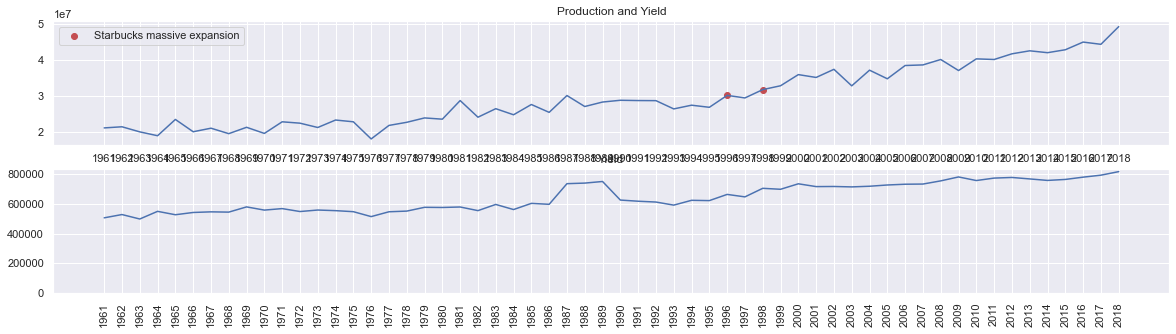

In [46]:
totalProd = caffeineProduction[caffeineProduction['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
totalYield = caffeineYield[caffeineYield['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
# plot.set_ylim(ymin=0)

fig, axes = plt.subplots(2, 1, figsize=(20, 5))
plt.xticks(rotation=90)
axes[0].plot(totalProd)
axes[0].set_title('Production and Yield')
axes[1].plot(totalYield)
axes[1].set_title('Yield')
# plt.xticks(rotation=90)
plt.ylim(0)
axes[0].scatter(['1996', '1998'], [totalProd['1996'], totalProd['1998']], marker='o', color='r', label='Starbucks massive expansion')
axes[0].legend(loc='upper left')

From the starbucks website:
```    1998
    Extends the Starbucks brand into grocery channels across the U.S.
    Opens in underserved neighborhoods through joint-venture partnership with Magic Johnson.
    Launches Starbucks.com.
    Establishes the CUP Fund emergency financial assistance fund for partners.
    Opens stores in: England, Malaysia, New Zealand, Taiwan and Thailand.
    Total stores: 1,886
```
So this happened in 2003, hence the drop there. 
https://www.nytimes.com/2003/11/25/business/difficult-times-for-coffee-industry.html

In recent years, the climb has been phenomenal, which means that it is rather promising. Other economic sources also confirm this.